## scikit-learn中的PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
'''
In scikit-learn, the datasets.load_digits() function is used to load the handwritten digits dataset. 
This dataset consists of 8x8 pixel images of handwritten digits (0 through 9). Each image is represented 
as an array of length 64, where each element corresponds to the grayscale intensity of a pixel.
'''
X = digits.data
y = digits.target

In [3]:
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

In [4]:
X_train.shape

(1438, 64)

In [5]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 35.6 ms, sys: 12.6 ms, total: 48.2 ms
Wall time: 92.8 ms


KNeighborsClassifier()

In [6]:
knn_clf.score(X_test, y_test)

0.9888579387186629

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [8]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 5.12 ms, sys: 19.2 ms, total: 24.3 ms
Wall time: 3.28 ms


KNeighborsClassifier()

In [9]:
knn_clf.score(X_test_reduction, y_test)

0.6100278551532033

## 主成分所解释的方差

In [10]:
pca.explained_variance_ratio_ #第一个主成分坐标包含总方差14%的信息，第二个主成分坐标包含总方差13%的信息

array([0.14508041, 0.13711103])

In [11]:
pca.explained_variance_

array([175.12582375, 165.50602127])

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45080412e-01, 1.37111029e-01, 1.19632063e-01, 8.43419664e-02,
       5.87059601e-02, 5.02161477e-02, 4.34237664e-02, 3.61240226e-02,
       3.39909633e-02, 3.00451890e-02, 2.38963232e-02, 2.29315337e-02,
       1.81339234e-02, 1.78592610e-02, 1.47343734e-02, 1.41361855e-02,
       1.29347882e-02, 1.25512685e-02, 1.01108427e-02, 9.08559119e-03,
       8.98234676e-03, 7.71927256e-03, 7.63269100e-03, 7.10190424e-03,
       6.96282782e-03, 5.84539211e-03, 5.76943099e-03, 5.08524094e-03,
       4.84415183e-03, 4.35109901e-03, 3.73198116e-03, 3.57642962e-03,
       3.30857635e-03, 3.17973501e-03, 3.07260629e-03, 2.89235385e-03,
       2.51249976e-03, 2.27855541e-03, 2.22655573e-03, 2.00001310e-03,
       1.89442803e-03, 1.56836686e-03, 1.42688857e-03, 1.39048308e-03,
       1.20841568e-03, 1.10130498e-03, 9.81224375e-04, 8.81967994e-04,
       5.69624629e-04, 4.10141734e-04, 2.32011306e-04, 8.49434965e-05,
       5.37168969e-05, 5.27741240e-05, 1.03358281e-05, 6.20451833e-06,
      

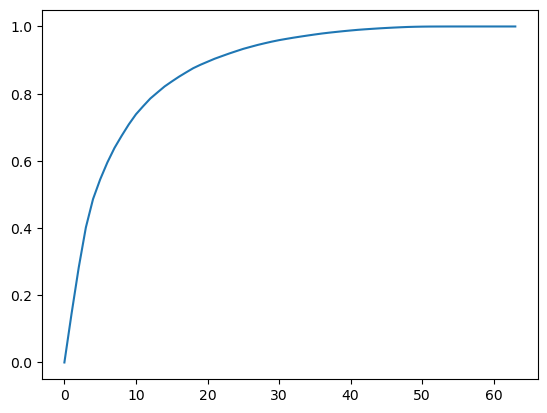

In [13]:
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i]) for i in range(X_train.shape[1])])

In [14]:
pca = PCA(0.95) #意味着保留95%的方差信息
pca.fit(X_train)

PCA(n_components=0.95)

In [15]:
pca.n_components_ #前28个主成分包含了总方差95%的信息

28

In [16]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [17]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 1.84 ms, sys: 809 µs, total: 2.65 ms
Wall time: 2.07 ms


KNeighborsClassifier()

In [18]:
knn_clf.score(X_test_reduction, y_test)

0.9832869080779945

### 使用PCA对数据进行降维可视化(低维度的作用)

In [24]:
pca = PCA(n_components = 2)
pca.fit(X)
X_reduction = pca.transform(X)

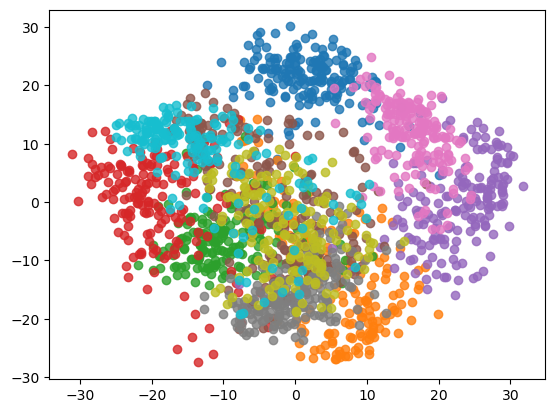

In [25]:
for i in range(10):
    plt.scatter(X_reduction[y == i, 0], X_reduction[y == i, 1], alpha = 0.8)
'''可以看到仅用两个维度就可以把0～9的手写数字区分出来，这就是低纬度可视化的作用'''

In [5]:
np.convolve((1,2,3,4), (5,6,7,8))

array([ 5, 16, 34, 60, 61, 52, 32])